<a href="https://colab.research.google.com/github/adalbertii/architektura-ai/blob/main/keras_classification_iris_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




Budowa modelu klasyfikacji wieloklasowej
Dataset: Iris


---




In [ ]:
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#from IPython.display import Image

In [ ]:
from sklearn.preprocessing import LabelBinarizer

**Uproszczona analiza danych**

In [ ]:
iris = pd.read_csv("/content/drive/MyDrive/dane/IRIS.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# analiza statystyczna zbioru danych
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#sprawdzenie rozkładu unikalnych wartości zmiennej objaśnianej
print(np.unique(iris['species'], return_counts=True))


(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object), array([50, 50, 50]))


**Przygotowanie danych do procesu uczenia**

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
X=iris.drop('species', axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
X.shape

(150, 4)

In [ ]:
y=iris['species']
y.head

<bound method NDFrame.head of 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object>

In [ ]:
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
encoder = LabelBinarizer()

y = encoder.fit_transform(y)
y[45:55]


array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]])

**Podział zbioru na dane treningowe i testowe**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state=101)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120, 3) (30, 3)


In [ ]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
104,6.5,3.0,5.8,2.2
89,5.5,2.5,4.0,1.3
116,6.5,3.0,5.5,1.8
82,5.8,2.7,3.9,1.2
112,6.8,3.0,5.5,2.1


In [ ]:
scaler = MinMaxScaler()

scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
scaled_X_train[0:5]

array([[0.61111111, 0.41666667, 0.81355932, 0.875     ],
       [0.33333333, 0.20833333, 0.50847458, 0.5       ],
       [0.61111111, 0.41666667, 0.76271186, 0.70833333],
       [0.41666667, 0.29166667, 0.49152542, 0.45833333],
       [0.69444444, 0.41666667, 0.76271186, 0.83333333]])

**Budowa modelu neuronowego**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(units=4, activation='relu', input_shape=[4,]))#
model.add(Dense(units=36, activation='relu'))
model.add(Dense(units=48, activation='relu'))
model.add(Dense(units=3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 4)                 20        
                                                                 
 dense_13 (Dense)            (None, 36)                180       
                                                                 
 dense_14 (Dense)            (None, 48)                1776      
                                                                 
 dense_15 (Dense)            (None, 3)                 147       
                                                                 
Total params: 2123 (8.29 KB)
Trainable params: 2123 (8.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Proces uczenia modelu**

In [ ]:
#from tensorflow.keras.callbacks import EarlyStopping

#early_stop = EarlyStopping(monitor='val_accuracy', patience=3)
#model.fit(x=scaled_X_train, y=y_train, epochs=300, validation_data=(scaled_X_test, y_test), callbacks=[early_stop])
model.fit(x=scaled_X_train, y=y_train, epochs=200, validation_data=(scaled_X_test, y_test))

Epoch 1/200
4/4 [==============================] - 1s 79ms/step - loss: 1.0879 - accuracy: 0.3500 - val_loss: 1.1023 - val_accuracy: 0.2667
Epoch 2/200
4/4 [==============================] - 0s 21ms/step - loss: 1.0782 - accuracy: 0.3500 - val_loss: 1.0986 - val_accuracy: 0.2667
Epoch 3/200
4/4 [==============================] - 0s 21ms/step - loss: 1.0703 - accuracy: 0.3500 - val_loss: 1.0947 - val_accuracy: 0.2667
Epoch 4/200
4/4 [==============================] - 0s 19ms/step - loss: 1.0626 - accuracy: 0.3500 - val_loss: 1.0916 - val_accuracy: 0.3000
Epoch 5/200
4/4 [==============================] - 0s 14ms/step - loss: 1.0577 - accuracy: 0.3500 - val_loss: 1.0894 - val_accuracy: 0.3000
Epoch 6/200
4/4 [==============================] - 0s 15ms/step - loss: 1.0500 - accuracy: 0.3500 - val_loss: 1.0852 - val_accuracy: 0.3000
Epoch 7/200
4/4 [==============================] - 0s 20ms/step - loss: 1.0427 - accuracy: 0.3500 - val_loss: 1.0797 - val_accuracy: 0.3000
Epoch 8/200
4/4 [===

In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,1.087856,0.35,1.102284,0.266667
1,1.078175,0.35,1.098599,0.266667
2,1.070312,0.35,1.094666,0.266667
3,1.062587,0.35,1.091572,0.300000
4,1.057708,0.35,1.089448,0.300000


<Axes: >

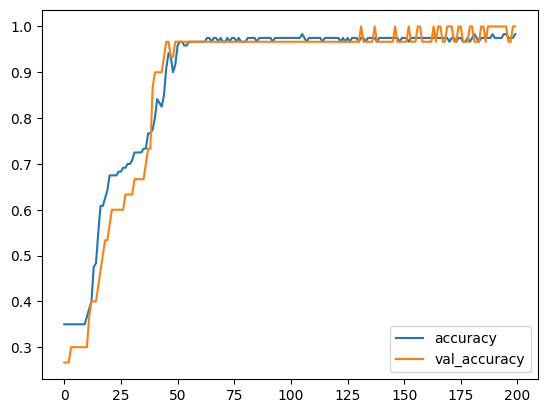

In [ ]:
metrics[['accuracy', 'val_accuracy']].plot()

<Axes: >

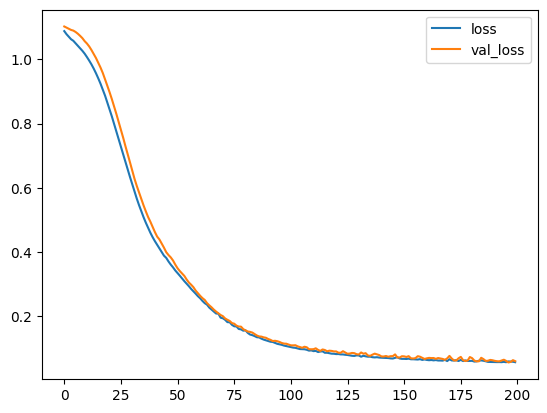

In [ ]:
metrics[['loss', 'val_loss']].plot()

**Ewaluacja modelu**

In [ ]:
model.evaluate(scaled_X_test,y_test,verbose=0)

[0.060796499252319336, 1.0]

In [ ]:
y_pred = model.predict(scaled_X_test)

1/1 [==============================] - 0s 72ms/step


In [ ]:
y_pred[:5]

array([[9.9731827e-01, 2.6817010e-03, 2.0130477e-08],
       [9.9802828e-01, 1.9717463e-03, 2.0862954e-08],
       [9.9822211e-01, 1.7779007e-03, 2.7000253e-08],
       [1.6747648e-06, 1.9871543e-01, 8.0128288e-01],
       [2.5770548e-04, 9.9561858e-01, 4.1236021e-03]], dtype=float32)

In [ ]:
# Macierz konfuzji
from sklearn.metrics import classification_report,confusion_matrix
conf_test=confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

print(conf_test)

[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]


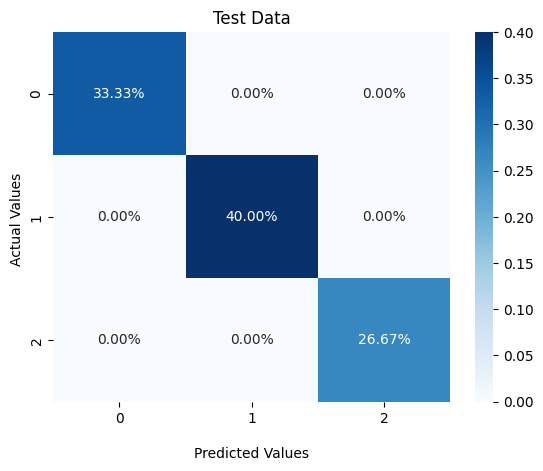

In [ ]:
ax = sns.heatmap(conf_test/np.sum(conf_test), annot=True,
            fmt='.2%', cmap='Blues')

ax.set_title('Test Data');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


plt.show()

In [ ]:
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Zapianie wytrenowanego modelu w repozytorium**

In [ ]:
# zapis wytrenowanego modelu do późniejszego wykorzystania
model.save("/content/drive/MyDrive/dane/modele/final_iris_model.h5")

In [ ]:
import joblib

# zapis obiektu skalera danych wejściowych do modelu
joblib.dump(scaler, '/content/drive/MyDrive/dane/modele/iris_scaler.pkl')

['/content/drive/MyDrive/dane/modele/iris_scaler.pkl']